In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" dizrectory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Valueinvestor/Vauleinvestor/2020Q1Q2Q3Q4-2021Q1 - Russia - Sberbank Rossii PAO (SBER).csv
/kaggle/input/Valueinvestor/Vauleinvestor/2020Q1Q2Q3Q4-2021Q1 - South Korea - Dongkuk Steel Mill Co Ltd (001230).csv
/kaggle/input/Valueinvestor/Vauleinvestor/2020Q1Q2Q3Q4-2021Q1 - Turkey - Koc Holding AS (KCHOL).csv
/kaggle/input/Valueinvestor/Vauleinvestor/2020Q1Q2Q3Q4-2021Q1 - Egypt - Medinet Nasr Housing (MNHD).csv
/kaggle/input/Valueinvestor/Vauleinvestor/2020Q1Q2Q3Q4-2021Q1 - Colombia - Cementos Argos SA (CCB).csv
/kaggle/input/Valueinvestor/Vauleinvestor/2020Q1Q2Q3Q4-2021Q1 - Brazil - Minerva SA_Brazil (BEEF3).csv
/kaggle/input/Valueinvestor/Vauleinvestor/2020Q1Q2Q3Q4-2021Q1 - Argentina - Pampa Energia SA (PAMP).csv
/kaggle/input/Valueinvestor/Vauleinvestor/2020Q1Q2Q3Q4-2021Q1 - South Africa - Impala Platinum Holdings Ltd (IMPJ).csv


In [2]:

import re
path = r"../input/Valueinvestor/Vauleinvestor"  # 读取csv文件目录路径
# listdir()--返回path指定 的 文件夹中包含的文件或者文件夹名字 的 列表
FileNames = os.listdir(path)# 因此Filename是一个列表
for fn in FileNames:
    # re.search(pattern, string, flags=0) 扫描整个字符串并返回第一个成功的匹配
    # pattern：匹配的正则表达式
    # string：要匹配的字符串
    # flags：表达式，用于控制正则表达式的匹配方式
    if re.search(r'\.csv$', fn):
        fullfilename = os.path.join(path, fn)
        df = pd.read_csv(fullfilename,encoding='utf-8',on_bad_lines='skip')
#         print(fn)  # 文件名
#         print(df)  # 数据

In [3]:
data_orig = pd.read_csv('../input/Valueinvestor/Vauleinvestor/2020Q1Q2Q3Q4-2021Q1 - Argentina - Pampa Energia SA (PAMP).csv')

In [4]:

data_orig = data_orig.iloc[:-1]
data_orig.tail(5)

,Date,Price,Open,High,Low,Vol.,Change %
295,"Jan 08, 2020",46.5,47.5,47.5,46,1.18M,-2.31%
296,"Jan 07, 2020",47.6,48.35,49,46.9,901.95K,-1.86%
297,"Jan 06, 2020",48.5,48.4,48.7,47,719.24K,-0.61%
298,"Jan 03, 2020",48.8,48.25,49.45,46.5,595.36K,1.14%
299,"Jan 02, 2020",48.25,49.35,50.2,47.55,878.50K,-2.92%


# Forecast stock price on  1 day basis

In [5]:
# data = data_orig.iloc[::-1]
# data = data.iloc[1:]
data = data_orig[['Date','Price','Open','High','Low','Vol.','Change %']]

# for i, value in enumerate(data['Vol.']):
#     if value[-1] == "K":
#         data['Vol.'][i] = float(value[:-1]) * 1000
#     elif value[-1] == "M":
#         data['Vol.'][i] = float(value[:-1]) * 1000 * 1000

data['Vol.'] = data['Vol.'].str.strip('K')
data['Vol.'] = data['Vol.'].str.strip('M')
data['Vol.'] = data['Vol.'].str.replace('.','')
data['Vol.'] = data['Vol.'].apply(lambda x: int(x)*10 if len(str(x))>3 else int(x)*10000)
data['Change %'] = data['Change %'].str.strip('%').astype('float')/100

# Split train data and test data
data_test = data.iloc[:60,:]
data_test = data_test[::-1]

data_train = data.iloc[60:,:]
# data_train = data_train.iloc[:-1,:]
data_train = data_train[::-1]


# pd.set_option('display.max_rows',None)
data_train['label'] = data_train['Price'].shift(-1)
data_train.drop(data_train.index[-1],inplace=True)

data_test['label'] = data_test['Price'].shift(-1)
data_test.drop(data_test.index[-1],inplace=True)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]


In [6]:
from sklearn import preprocessing,svm
y_train = np.array(data_train['label'])
x_train = np.array(data_train.drop(['label','Date'],1))
x_train = preprocessing.scale(x_train)


y_test = np.array(data_test['label'])
x_test = np.array(data_test.drop(['label','Date'],1))
x_test = preprocessing.scale(x_test)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [7]:
# predcit 2021Q1 Stock price
clf=svm.SVR()
fold_model = clf.fit(x_train,y_train)
predictions = fold_model.predict(x_test)
predictions

array([41.75069315, 43.46109495, 45.17059271, 45.85625108, 48.984667  ,
       46.451042  , 42.12480982, 43.64074648, 45.70589565, 42.54849616,
       44.33217083, 44.06063373, 47.98549805, 47.29032747, 43.27352933,
       42.22049677, 50.69919368, 51.47352264, 58.02785827, 53.94819941,
       49.76130318, 55.29211592, 51.92996916, 56.42923405, 65.89297263,
       68.14935871, 69.19500884, 68.95874222, 63.95460116, 64.76223314,
       62.50205772, 71.71488175, 68.94117214, 61.07794512, 57.92451235,
       57.60215979, 51.30556946, 46.99280711, 48.42929312, 50.66904738,
       47.5198571 , 53.68769053, 54.55768046, 54.81028247, 55.69791789,
       57.5773062 , 63.65122597, 65.38192   , 73.34932827, 75.31555714,
       78.71051731, 77.28293223, 79.03826805, 78.95565718, 74.55817614,
       65.6443597 , 59.66790057, 60.22211092, 70.79569423])

# Forecast stock price on weekly, monthly basis

In [8]:
data = data_orig[['Date','Price']]

In [9]:

data['Date'] = data['Date'].str.replace('Jan','January')
data['Date'] = data['Date'].str.replace('Feb','February')
data['Date'] = data['Date'].str.replace('Mar','March')
data['Date'] = data['Date'].str.replace('Apr','April')
data['Date'] = data['Date'].str.replace('Jun','June')
data['Date'] = data['Date'].str.replace('Jul','July')
data['Date'] = data['Date'].str.replace('Aug','August')
data['Date'] = data['Date'].str.replace('Sep','September')
data['Date'] = data['Date'].str.replace('Oct','October')
data['Date'] = data['Date'].str.replace('Nov','November')
data['Date'] = data['Date'].str.replace('Dec','December')
data = data.iloc[:-1,:]

from datetime import datetime
def str_to_datetime(s):
    s = datetime.strptime(s, '%B %d, %Y')
    s = s.strftime('%Y-%m-%d')
    s = datetime.strptime(s,'%Y-%m-%d')
    return s 

data['Date'] = data['Date'].apply(str_to_datetime)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

# Split train data and test data

In [10]:
# test data
data_test = data.iloc[:60,:]
data_test = data_test[::-1]
data_test.set_index('Date',inplace=True)
# train data
data_train = data.iloc[60:,:]
# data_train = data_train.iloc[:-1,:]
data_train = data_train[::-1]
data_train.set_index('Date',inplace=True)



In [11]:
data_test

,Price
Date,
2021-01-04,76.7
2021-01-05,78.3
2021-01-06,78
2021-01-07,79.95
2021-01-08,79
2021-01-11,75.5
2021-01-12,76
2021-01-13,77.5
2021-01-14,77


In [12]:
data.set_index('Date',inplace=True)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
data['Price'] = scaler.fit_transform(data['Price'].values.reshape(-1,1))


In [14]:
def load_data(stock,data_test,look_back):
    data_raw = stock.values # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
   
    data = np.array(data);
    
    test_set_size = int(data_test.shape[0])
    train_set_size = data.shape[0] - (test_set_size)
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

# Predict Stock price on weekly basis

In [15]:
look_back = 5 # choose sequence length
x_train, y_train, x_test, y_test = load_data(data,data_test,look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (234, 4, 1)
y_train.shape =  (234, 1)
x_test.shape =  (60, 4, 1)
y_test.shape =  (60, 1)


In [16]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.metrics import mean_squared_error
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [17]:
# Build model
#####################
input_dim = 1
hidden_dim = 32
num_layers = 2 
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out
    
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
10
torch.Size([128, 1])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


In [18]:
# Train model
#####################
num_epochs = 500
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.02488422952592373
Epoch  20 MSE:  0.013310076668858528
Epoch  30 MSE:  0.01700226403772831
Epoch  40 MSE:  0.012659053318202496
Epoch  50 MSE:  0.01143824215978384
Epoch  60 MSE:  0.01126998383551836
Epoch  70 MSE:  0.010820157825946808
Epoch  80 MSE:  0.010482092387974262
Epoch  90 MSE:  0.010162783786654472
Epoch  100 MSE:  0.009798021987080574
Epoch  110 MSE:  0.009404512122273445
Epoch  120 MSE:  0.008974074386060238
Epoch  130 MSE:  0.008499959483742714
Epoch  140 MSE:  0.007980790920555592
Epoch  150 MSE:  0.00742587074637413
Epoch  160 MSE:  0.006871385034173727
Epoch  170 MSE:  0.006399985868483782
Epoch  180 MSE:  0.006104776170104742
Epoch  190 MSE:  0.005953104235231876
Epoch  200 MSE:  0.010245529003441334
Epoch  210 MSE:  0.006650988012552261
Epoch  220 MSE:  0.005921637173742056
Epoch  230 MSE:  0.0057096825912594795
Epoch  240 MSE:  0.005594839341938496
Epoch  250 MSE:  0.005569055210798979
Epoch  260 MSE:  0.005534973461180925
Epoch  270 MSE:  0.005521

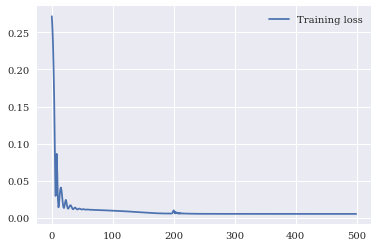

In [19]:
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [20]:
import math, time
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

y_test

array([[38.      ],
       [37.85    ],
       [38.05    ],
       [35.8     ],
       [35.6     ],
       [38.8     ],
       [40.25    ],
       [34.      ],
       [33.      ],
       [34.75    ],
       [37.      ],
       [34.55    ],
       [37.2     ],
       [36.6     ],
       [38.899998],
       [40.9     ],
       [37.8     ],
       [43.65    ],
       [45.75    ],
       [46.6     ],
       [44.399998],
       [43.199997],
       [39.449997],
       [39.4     ],
       [39.25    ],
       [42.45    ],
       [42.8     ],
       [42.1     ],
       [42.25    ],
       [43.8     ],
       [42.9     ],
       [44.149998],
       [45.3     ],
       [45.3     ],
       [46.499996],
       [47.      ],
       [46.95    ],
       [46.35    ],
       [46.899998],
       [47.75    ],
       [45.2     ],
       [45.8     ],
       [45.      ],
       [46.3     ],
       [45.3     ],
       [44.8     ],
       [46.4     ],
       [48.45    ],
       [46.899998],
       [49.35    ],


# Predict Stock price on monthly basis

In [21]:
look_back = 20 # choose sequence length
x_train, y_train, x_test, y_test = load_data(data,data_test,look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (219, 19, 1)
y_train.shape =  (219, 1)
x_test.shape =  (60, 19, 1)
y_test.shape =  (60, 1)


In [22]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [23]:
# Train model
#####################
num_epochs = 500
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.021463241428136826
Epoch  20 MSE:  0.014324198476970196
Epoch  30 MSE:  0.007537924684584141
Epoch  40 MSE:  0.007368461228907108
Epoch  50 MSE:  0.006201643031090498
Epoch  60 MSE:  0.006013054866343737
Epoch  70 MSE:  0.005796445999294519
Epoch  80 MSE:  0.005739129148423672
Epoch  90 MSE:  0.005688879173249006
Epoch  100 MSE:  0.005662897601723671
Epoch  110 MSE:  0.005641670897603035
Epoch  120 MSE:  0.005626488011330366
Epoch  130 MSE:  0.005614453461021185
Epoch  140 MSE:  0.005604879930615425
Epoch  150 MSE:  0.005596985574811697
Epoch  160 MSE:  0.005590308923274279
Epoch  170 MSE:  0.005584545899182558
Epoch  180 MSE:  0.0055794804356992245
Epoch  190 MSE:  0.005574964452534914
Epoch  200 MSE:  0.005570888519287109
Epoch  210 MSE:  0.005567166488617659
Epoch  220 MSE:  0.005563737824559212
Epoch  230 MSE:  0.005560544319450855
Epoch  240 MSE:  0.00555754778906703
Epoch  250 MSE:  0.005554710980504751
Epoch  260 MSE:  0.005552004091441631
Epoch  270 MSE:  0.00

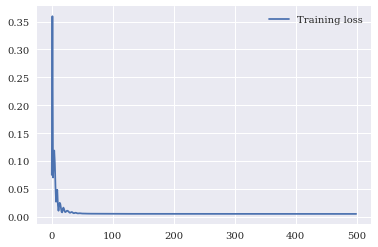

In [24]:
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [25]:
import math, time
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

y_test

array([[38.      ],
       [37.85    ],
       [38.05    ],
       [35.8     ],
       [35.6     ],
       [38.8     ],
       [40.25    ],
       [34.      ],
       [33.      ],
       [34.75    ],
       [37.      ],
       [34.55    ],
       [37.2     ],
       [36.6     ],
       [38.899998],
       [40.9     ],
       [37.8     ],
       [43.65    ],
       [45.75    ],
       [46.6     ],
       [44.399998],
       [43.199997],
       [39.449997],
       [39.4     ],
       [39.25    ],
       [42.45    ],
       [42.8     ],
       [42.1     ],
       [42.25    ],
       [43.8     ],
       [42.9     ],
       [44.149998],
       [45.3     ],
       [45.3     ],
       [46.499996],
       [47.      ],
       [46.95    ],
       [46.35    ],
       [46.899998],
       [47.75    ],
       [45.2     ],
       [45.8     ],
       [45.      ],
       [46.3     ],
       [45.3     ],
       [44.8     ],
       [46.4     ],
       [48.45    ],
       [46.899998],
       [49.35    ],


# Calculate Bollinger Bands

In [26]:
data = data_orig.iloc[::-1]
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
299,"Jan 02, 2020",48.25,49.35,50.2,47.55,878.50K,-2.92%
298,"Jan 03, 2020",48.8,48.25,49.45,46.5,595.36K,1.14%
297,"Jan 06, 2020",48.5,48.4,48.7,47,719.24K,-0.61%
296,"Jan 07, 2020",47.6,48.35,49,46.9,901.95K,-1.86%
295,"Jan 08, 2020",46.5,47.5,47.5,46,1.18M,-2.31%


# Calculate Simple Moving Average, Standard Deviation, Upper Band and the Lower Band

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

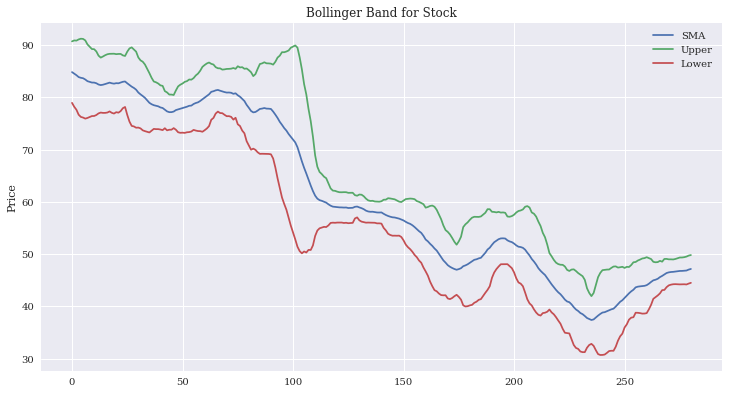

In [27]:
period = 20
#Simple Moving Average
data['SMA'] = data['Price'].rolling(window=period).mean()
#Standard Deviation
data['STD'] = data['Price'].rolling(window=period).std()
#Upper Band
data['Upper'] = data['SMA'] + (data['STD'] * 2)
#Lower Band
data['Lower'] = data['SMA'] - (data['STD'] * 2)

column_list = ['Price', 'SMA', 'Upper', 'Lower']
data[column_list].plot(figsize=(12.2,6.4))
plt.title('Bollinger Band for Stock')
plt.ylabel('Price')
plt.show()

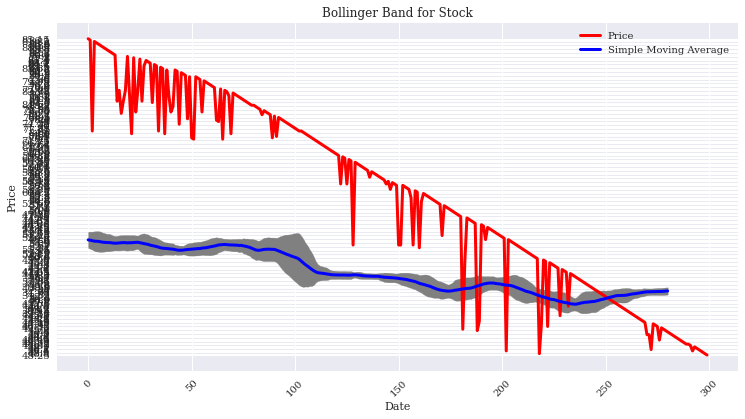

In [28]:
fig = plt.figure(figsize=(12.2, 6.4))
ax = fig.add_subplot(1,1,1)
x_axis = data.index
ax.fill_between(x_axis, data['Upper'], data['Lower'], color = 'grey')
ax.plot(x_axis, data['Price'], color = 'red', lw = 3, label = 'Price')
ax.plot(x_axis, data['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average')
ax.set_title('Bollinger Band for Stock')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [29]:
new_data = data[period-1:]
new_data['Price'] = new_data['Price'].astype('float')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
new_data

,Date,Price,Open,High,Low,Vol.,Change %,SMA,STD,Upper,Lower
280,"Jan 29, 2020",45.00,47.9,47.9,45,433.44K,-2.81%,47.1825,1.328758,49.840017,44.524983
279,"Jan 30, 2020",45.80,45,45.95,43.8,602.97K,1.78%,47.0600,1.338066,49.736132,44.383868
278,"Jan 31, 2020",45.20,45.75,46.25,44.3,222.83K,-1.31%,46.8800,1.333811,49.547623,44.212377
277,"Feb 03, 2020",47.75,46.05,48.45,44.35,903.36K,5.64%,46.8425,1.295871,49.434243,44.250757
276,"Feb 04, 2020",46.90,48.3,49.95,45.55,939.97K,-1.78%,46.8075,1.283732,49.374963,44.240037
...,...,...,...,...,...,...,...,...,...,...,...
4,"Mar 25, 2021",83.60,85.2,87.3,82.1,389.78K,-3.13%,83.7575,3.741421,91.240342,76.274658
3,"Mar 26, 2021",81.85,84,84.6,80.7,462.55K,-2.09%,83.9000,3.602375,91.104750,76.695250
2,"Mar 29, 2021",85.00,80,86,79,371.22K,3.85%,84.2600,3.308466,90.876932,77.643068
1,"Mar 30, 2021",86.10,85.15,86.75,84.6,141.40K,1.29%,84.5650,3.173496,90.911993,78.218007


In [31]:
def get_signal(df):
    buy_signal = []
    sell_signal = []
    
    for i in range(len(df['Price'])):
        if df['Price'].values[i] > df['Upper'].values[i]:
            buy_signal.append(np.nan)
            sell_signal.append(data['Price'].values[i])
        elif df['Price'].values[i] < df['Lower'].values[i]:
            buy_signal.append(df['Price'].values[i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
        
    return(buy_signal, sell_signal)

In [32]:
new_data['Buy'] = get_signal(new_data)[0]
new_data['Sell'] = get_signal(new_data)[1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Predict when to sell or buy 

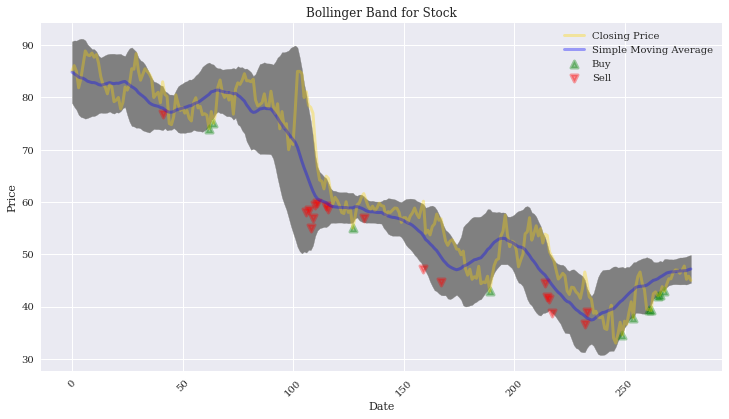

In [34]:
fig = plt.figure(figsize=(12.2, 6.4))
ax = fig.add_subplot(1,1,1)
x_axis = new_data.index
ax.fill_between(x_axis, new_data['Upper'], new_data['Lower'], color = 'grey')
ax.plot(x_axis, new_data['Price'], color = 'gold', lw = 3, label = 'Closing Price', alpha = 0.35)
ax.plot(x_axis, new_data['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average', alpha = 0.35)
ax.scatter(x_axis, new_data['Buy'], color = 'green', lw = 3, label = 'Buy', marker = "^", alpha = 0.35)
ax.scatter(x_axis, new_data['Sell'], color = 'red', lw = 3, label = 'Sell', marker = "v", alpha = 0.35)
ax.set_title('Bollinger Band for Stock')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.xticks(rotation = 45)
ax.legend()
plt.show()
